In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
p = np.linspace(0, 20, 100)
plt.plot(p, np.sin(15*p))

plt.show()

In [ ]:
import pandas as pd
import pandas_datareader as pdr
v = pdr.get_data_fred('GS10')


In [ ]:
v

In [ ]:
import os
import pandas_datareader.data as pdr

API_KEY = os.environ['ALPHA_VANTAGE_API_KEY']

DATE_START = '2019-01-01'
DATE_END = '2019-10-11'
SYMBOL = 'AAPL'

# We use the 'av-daily' DataReader to download data from AlphaVantage
stock = pdr.DataReader(SYMBOL, 'av-daily',
                       start=DATE_START,
                       end=DATE_END,
                       api_key=API_KEY)

print(stock)

In [ ]:
import hvplot.pandas

idx = pd.date_range('1/1/2000', periods=1000)
df  = pd.DataFrame(np.random.randn(1000, 4), index=idx, columns=list('ABCD')).cumsum()

df.hvplot()

In [ ]:
from hvplot.sample_data import us_crime

columns = ['Burglary rate', 'Larceny-theft rate', 'Robbery rate', 'Violent Crime rate']
us_crime.plot.violin(y=columns, group_label='Type of crime', value_label='Rate per 100k', invert=True, width=1600, height=800)

In [ ]:
"""
Repeated Choropleth Map
=======================
Three choropleths representing disjoint data from the same table.
"""
# category: maps
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

In [ ]:
import numpy as np

# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

# My word count data
day_num = np.linspace(1, 10, 10)
daily_words = [450, 628, 488, 210, 287, 791, 508, 639, 397, 943]
cumulative_words = np.cumsum(daily_words)

# Output the visualization directly in the notebook
output_notebook()

# Create a figure with a datetime type x-axis
fig = figure(title='My Tutorial Progress',
             plot_height=400, plot_width=700,
             x_axis_label='Day Number', y_axis_label='Words Written',
             x_minor_ticks=2, y_range=(0, 6000),
             toolbar_location=None)

# The daily words will be represented as vertical bars (columns)
fig.vbar(x=day_num, bottom=0, top=daily_words, 
         color='blue', width=0.75, 
         legend='Daily')

# The cumulative sum will be a trend line
fig.line(x=day_num, y=cumulative_words, 
         color='gray', line_width=1,
         legend='Cumulative')

# Put the legend in the upper left corner
fig.legend.location = 'top_left'

# Let's check it out
show(fig)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Equation of ring cyclide
# see https://en.wikipedia.org/wiki/Dupin_cyclide
import numpy as np
a, b, d = 1.32, 1., 0.8
c = a**2 - b**2
u, v = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
x = (d * (c - a * np.cos(u) * np.cos(v)) + b**2 * np.cos(u)) / (a - c * np.cos(u) * np.cos(v))
y = b * np.sin(u) * (a - d*np.cos(v)) / (a - c * np.cos(u) * np.cos(v))
z = b * np.sin(v) * (c*np.cos(u) - d) / (a - c * np.cos(u) * np.cos(v))

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=x**2 + y**2 + z**2), 1, 2)
fig.update_layout(title_text="Ring cyclide")
fig.show()

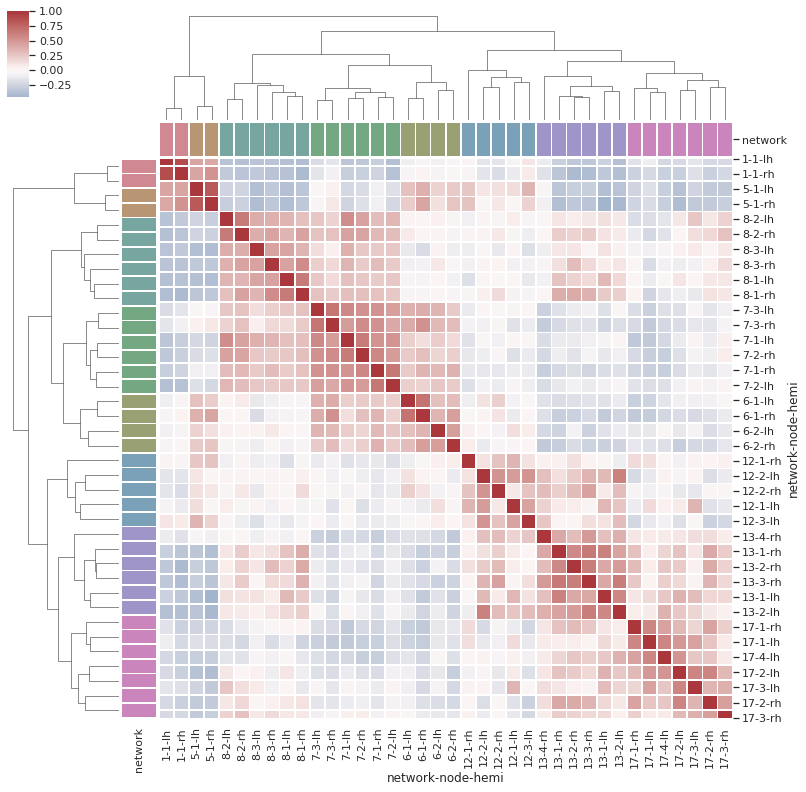

In [5]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))